In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
from sklearn.datasets import make_classification

In [9]:
X,y = make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=15)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [14]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9166666666666666
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       160
           1       0.90      0.92      0.91       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[146  14]
 [ 11 129]]


In [15]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [16]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [17]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [18]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [19]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)


In [21]:
print(grid)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')


In [22]:
grid.fit(X_train,y_train)

C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\suman\AppData\Roaming\Python\Python311\site

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [23]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [24]:
grid.best_score_

0.9242857142857142

In [25]:
y_pred=grid.predict(X_test)


In [26]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.92
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       165
           1       0.89      0.94      0.91       135

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[149  16]
 [  8 127]]


In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [29]:
randomcv.fit(X_train,y_train)

C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\suman\

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [30]:
randomcv.best_score_

0.9185714285714285

In [31]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}

In [32]:
y_pred=randomcv.predict(X_test)

In [33]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.92
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       163
           1       0.90      0.93      0.91       137

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[148  15]
 [  9 128]]


In [34]:
X, y = make_classification(n_samples=1000, n_features=10,n_informative=3, n_classes=3, random_state=15)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [37]:
y_pred

array([2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2])

In [38]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.79
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.73      0.81      0.77        91
           2       0.82      0.71      0.76       112

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[84  3 10]
 [10 74  7]
 [ 8 25 79]]


In [39]:
from collections import Counter
from sklearn.datasets import make_classification

In [40]:
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)


In [41]:
Counter(y)

Counter({0: 9846, 1: 154})

In [44]:
import seaborn as sns
import pandas as pd
df=pd.DataFrame(X)
df

,0,1
0,1.879910,-1.485035
1,0.377083,-2.238585
2,1.354312,-2.664638
3,-0.509843,-1.502950
4,0.863561,-1.906364
...,...,...
9995,1.066698,-0.548159
9996,1.058723,-0.933768
9997,0.995099,-0.541924
9998,1.758594,-1.549612


<Axes: xlabel='0', ylabel='1'>

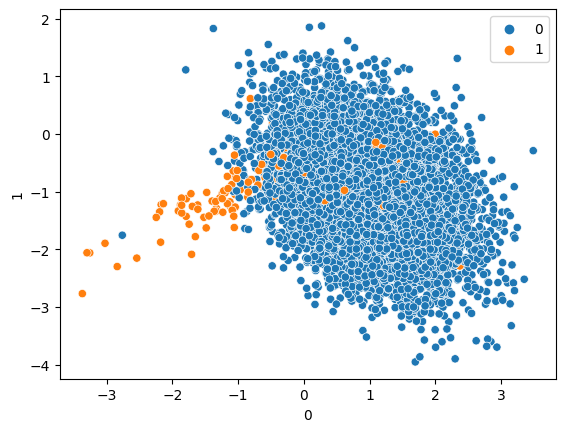

In [53]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [55]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [56]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [58]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [65]:

grid.fit(X_train,y_train)
warnings.filterwarnings('ignore')


In [67]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [69]:
y_pred=grid.predict(X_test)


In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.992
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2486
           1       0.40      0.86      0.55        14

    accuracy                           0.99      2500
   macro avg       0.70      0.92      0.77      2500
weighted avg       1.00      0.99      0.99      2500

[[2468   18]
 [   2   12]]


In [73]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
f1

0.5454545454545454

In [74]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [75]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [84]:
dummy_model_prob = [0 for _ in range(len(y_test))]


In [78]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [88]:
model_prob=model.predict_proba(X_test)

In [89]:
model_prob=model_prob[:,1]

In [90]:
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [91]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [92]:
import seaborn as sns

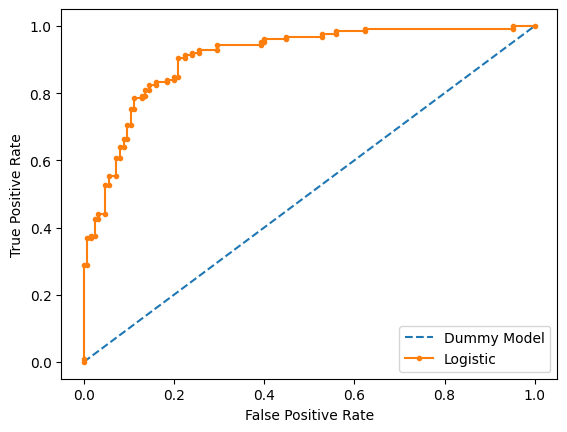

In [93]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


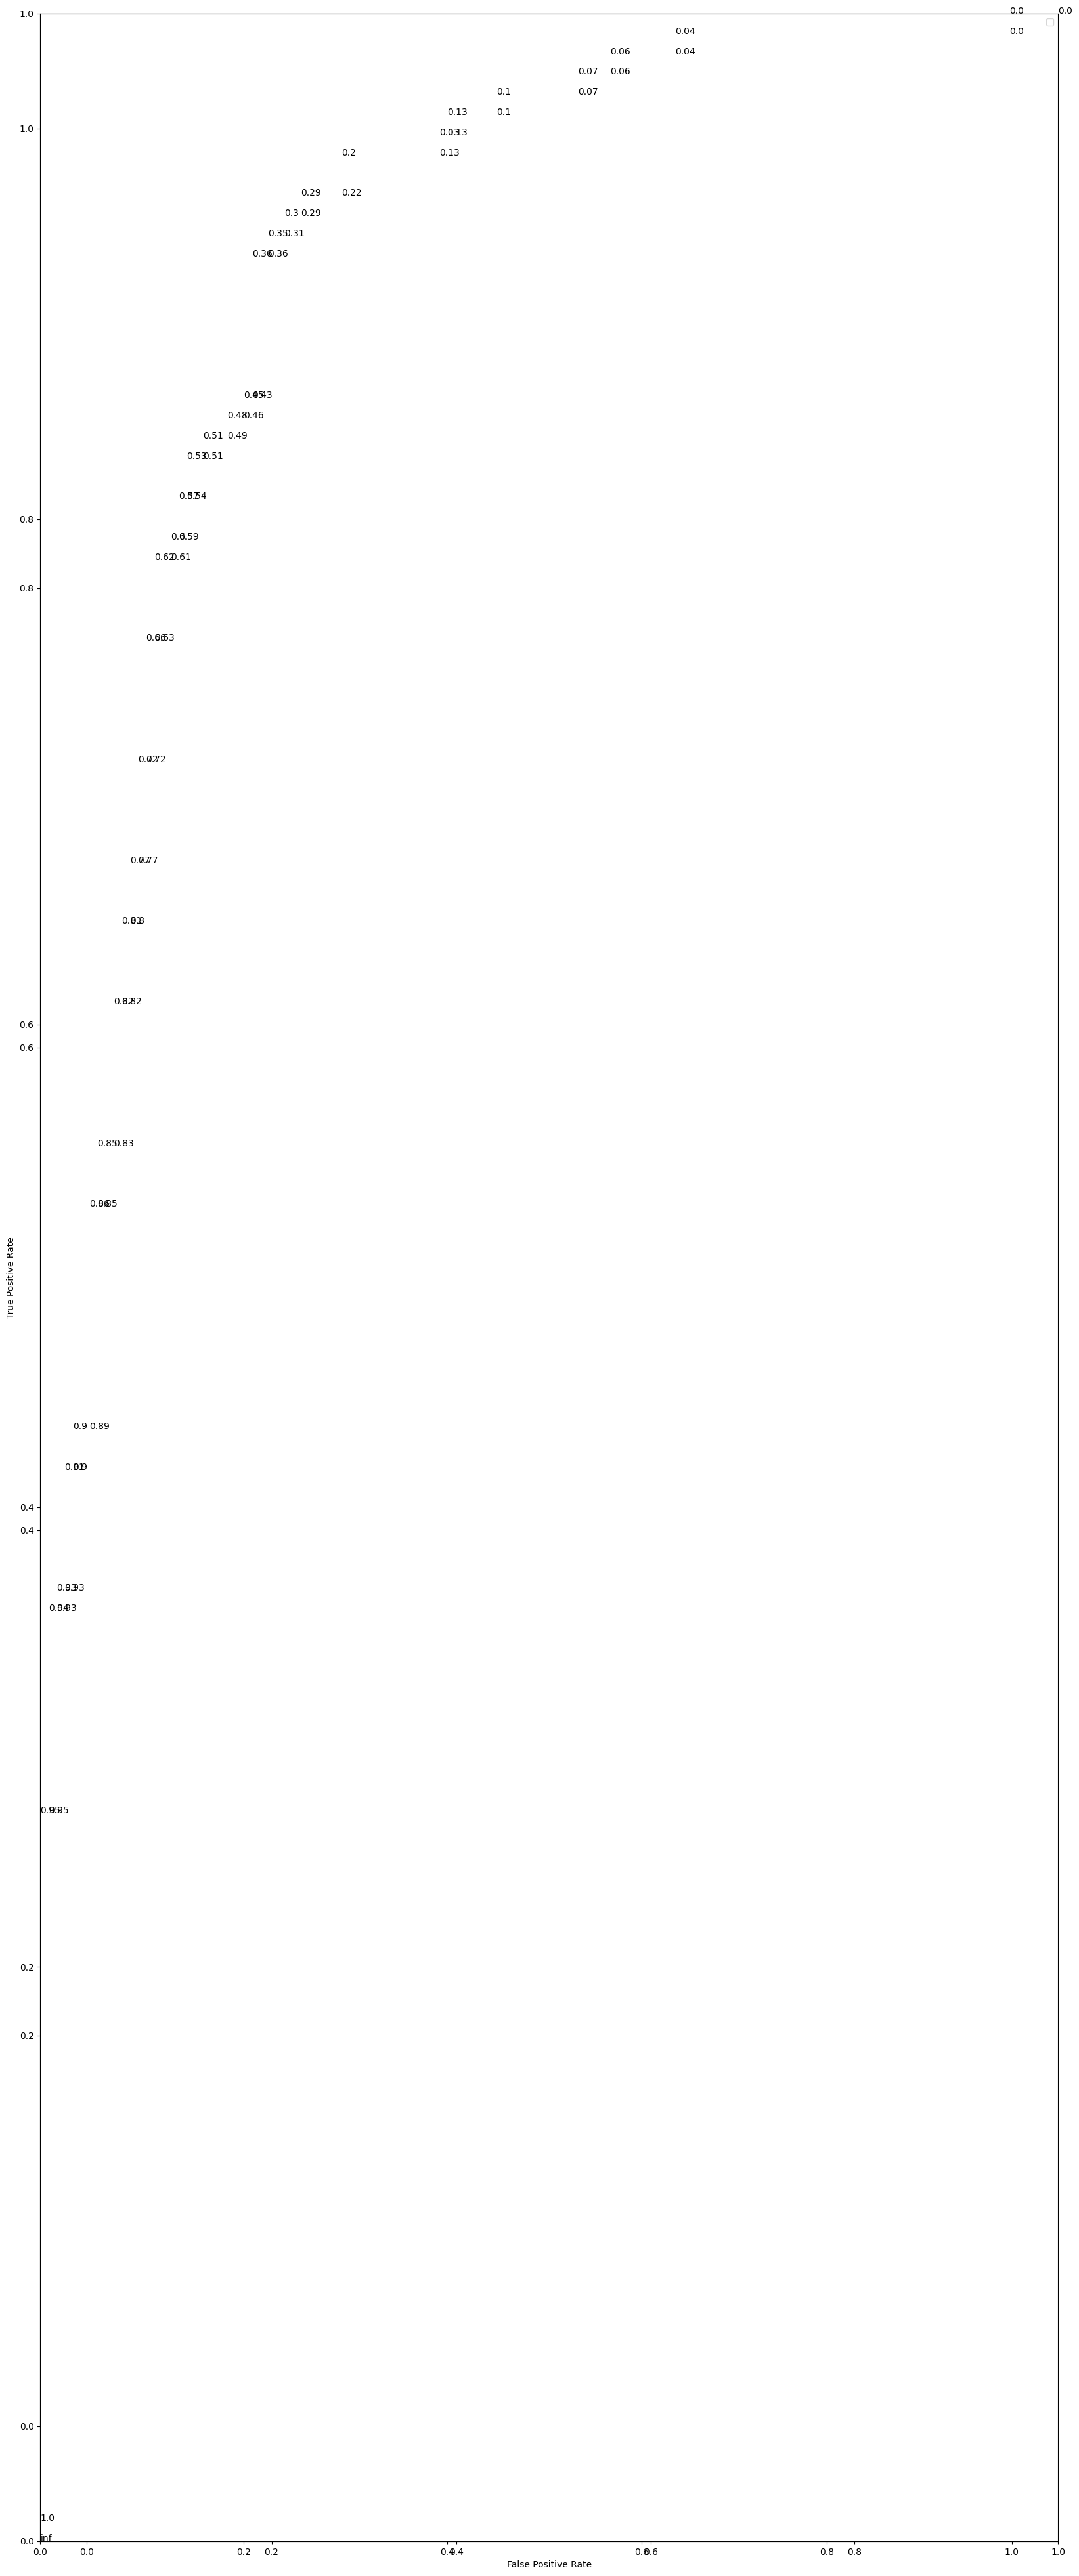

In [94]:
import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()